In [11]:
import os
import sys

ROOT_DIR = os.path.dirname(os.path.abspath(''))
sys.path.append(ROOT_DIR)

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

X_train = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\train\\X_train.txt')
y_train = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\train\\y_train.txt')

X_test = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\test\\X_test.txt')
y_test = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\test\\y_test.txt')

y_train = to_categorical(y_train - 1)  
y_test = to_categorical(y_test - 1)

X_train_bilstm = X_train.reshape(X_train.shape[0], 561, 1)
X_test_bilstm = X_test.reshape(X_test.shape[0], 561, 1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_bilstm = scaler.fit_transform(X_train)
X_test_bilstm = scaler.transform(X_test)

In [14]:
from models.bilstm_model import bilstm_model
model = bilstm_model((561, 1))
model.summary()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 561, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 561, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,286 (301.90 KB)

 Trainable params: 77,286 (301.90 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3),
    ModelCheckpoint("./models/bilstm_model.h5", save_best_only=True)
]

In [16]:
bilstm_history = model.fit(X_train_bilstm, y_train, 
          epochs=20, 
          validation_split=0.2,
          batch_size=64,
          callbacks=callbacks,
          verbose=1
          )

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.3517 - loss: 1.4265

92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 408ms/step - accuracy: 0.4028 - loss: 1.2311 - val_accuracy: 0.5996 - val_loss: 0.9658 - learning_rate: 0.0010
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.6248 - loss: 0.8519

92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 463ms/step - accuracy: 0.6478 - loss: 0.7947 - val_accuracy: 0.7036 - val_loss: 0.7623 - learning_rate: 0.0010
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.7124 - loss: 0.6800

92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - accuracy: 0.7230 - loss: 0.6486 - val_accuracy: 0.8008 - val_loss: 0.6501 - learning_rate: 0.0010
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 456ms/step - accuracy: 0.7438 - loss: 0.5956 - val_accuracy: 0.7777 - val_loss: 0.6629 - learning_rate: 0.0010
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.7662 - loss: 0.5667

92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 458ms/step - accuracy: 0.7664 - loss: 0.5595 - val_accuracy: 0.8151 - val_loss: 0.5953 - learning_rate: 0.0010
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 417ms/step - accuracy: 0.7733 - loss: 0.5256 - val_accuracy: 0.8158 - val_loss: 0.6018 - learning_rate: 0.0010
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 489ms/step - accuracy: 0.7939 - loss: 0.4839 - val_accuracy: 0.8158 - val_loss: 0.6236 - learning_rate: 0.0010
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 664ms/step - accuracy: 0.7949 - loss: 0.4795 - val_accuracy: 0.8199 - val_loss: 0.5964 - learning_rate: 0.0010
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.8114 - loss: 0.4337

92/92 ━━━━━━━━━━━━━━━━━━━━ 70s 759ms/step - accuracy: 0.8181 - loss: 0.4250 - val_accuracy: 0.8436 - val_loss: 0.5622 - learning_rate: 5.0000e-04
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 429ms/step - accuracy: 0.8266 - loss: 0.4117 - val_accuracy: 0.8341 - val_loss: 0.5716 - learning_rate: 5.0000e-04
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 422ms/step - accuracy: 0.8283 - loss: 0.3938 - val_accuracy: 0.8416 - val_loss: 0.5709 - learning_rate: 5.0000e-04
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8352 - loss: 0.3918

92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 441ms/step - accuracy: 0.8359 - loss: 0.3858 - val_accuracy: 0.8579 - val_loss: 0.5024 - learning_rate: 5.0000e-04
Epoch 13/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 412ms/step - accuracy: 0.8449 - loss: 0.3725 - val_accuracy: 0.8511 - val_loss: 0.5208 - learning_rate: 5.0000e-04
Epoch 14/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.8578 - loss: 0.3495

92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 447ms/step - accuracy: 0.8563 - loss: 0.3512 - val_accuracy: 0.8586 - val_loss: 0.4898 - learning_rate: 5.0000e-04
Epoch 15/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 450ms/step - accuracy: 0.8507 - loss: 0.3529 - val_accuracy: 0.8402 - val_loss: 0.5527 - learning_rate: 5.0000e-04
Epoch 16/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - accuracy: 0.8575 - loss: 0.3463 - val_accuracy: 0.8702 - val_loss: 0.5114 - learning_rate: 5.0000e-04
Epoch 17/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 461ms/step - accuracy: 0.8597 - loss: 0.3295 - val_accuracy: 0.8736 - val_loss: 0.4937 - learning_rate: 5.0000e-04
Epoch 18/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.8677 - loss: 0.3129

92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 456ms/step - accuracy: 0.8706 - loss: 0.3070 - val_accuracy: 0.8702 - val_loss: 0.4705 - learning_rate: 2.5000e-04
Epoch 19/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.8743 - loss: 0.3001

92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - accuracy: 0.8709 - loss: 0.3049 - val_accuracy: 0.8770 - val_loss: 0.4621 - learning_rate: 2.5000e-04
Epoch 20/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 442ms/step - accuracy: 0.8680 - loss: 0.2995 - val_accuracy: 0.8797 - val_loss: 0.4920 - learning_rate: 2.5000e-04


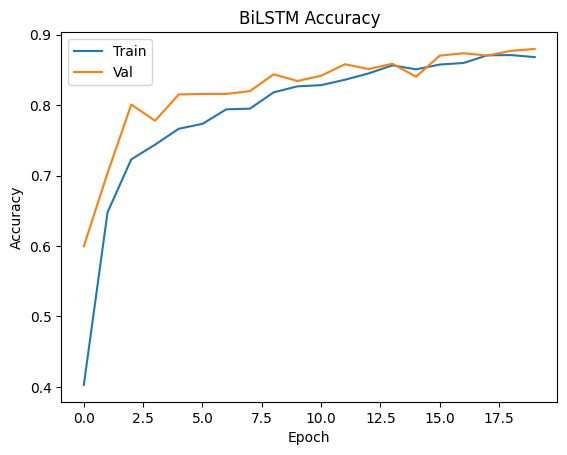

In [17]:
import matplotlib.pyplot as plt

plt.plot(bilstm_history.history["accuracy"])
plt.plot(bilstm_history.history["val_accuracy"])
plt.title("BiLSTM Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"])
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(X_test_bilstm, y_test)
print("Test Accuracy:", test_acc)

93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.8351 - loss: 0.4767
Test Accuracy: 0.8350865244865417
